# Capstone Project ML Algorithms.
## Batch C3 - HR Dataset

Team members:-
- Kushagra Agrawal (Kush Agrawal)
- Pranjal Prasun
- Srivatsan Govindarajan
- Subhasis Patra
- Sravan Songa

People Worked on this Jupyter Notebook
- Kushagra Agrawal (Kush Agrawal)
- Pranjal Prasun
- Srivatsan Govindarajan
- Subhasis Patra

### Problem Statement
Build an appropriate predictive model for classifying joined and not joined for the offers released. Perform comparative study of several predictive models with various approaches

In [60]:
from sklearn import metrics
from sklearn.metrics import classification_report
def print_scores(name,y_test,prediction):
    print("Name of the algorithm: "+name)
    print("Accuracy:",metrics.accuracy_score(y_test, prediction))
    print("Precision:",metrics.precision_score(y_test, prediction))
    print("Recall:",metrics.recall_score(y_test, prediction))
    print(classification_report(y_test,prediction))

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [62]:
#Getting the merged dataset into the pandas dataframe

data_path=os.path.abspath('C:/Users/kusagrawal/Desktop/Deloitte Training AI Academy/Capstone Project Material/Capstone Project Outputs/')
df=pd.read_excel(data_path+'/merged_dataset.xlsx',index_col=False)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [64]:
df.columns

Index(['sno', 'candidate_ref', 'doj_extended', 'duration_to_accept_offer',
       'notice_period', 'offered_band', 'percent_hike_expected_in_ctc',
       'percent_hike_offered_in_ctc', 'percent_difference_ctc',
       'joining_bonus', 'candidate_relocate_actual', 'gender',
       'candidate_source', 'rex_in_yrs', 'postal_code', 'age', 'lob_id',
       'domicile_id', 'domicile_name', 'date_of_interview', 'status', 'lob',
       'location_id', 'location', 'region_id', 'region_name'],
      dtype='object')

In [65]:
# dropping all the irrelevent columns

df1=df.drop(['sno','candidate_ref', 'percent_hike_expected_in_ctc', 'percent_hike_offered_in_ctc','postal_code','lob_id','domicile_id','date_of_interview','location_id','region_id',"region_name",'domicile_name'], axis=1)

In [66]:
#Dropping Records with Null Values (offered_band)
df1=df1.dropna()
df1

,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,age,status,lob,location
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,34.0,Joined,ERS,Noida
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,34.0,Joined,INFRA,Chennai
2,No,3,45,E2,0.00,No,No,Male,Agency,4,27.0,Joined,INFRA,Noida
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,34.0,Joined,INFRA,Noida
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,34.0,Joined,INFRA,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0,E1,0.00,No,No,Male,Employee Referral,1,34.0,Joined,ERS,Chennai
8991,Yes,2,0,E1,0.00,No,No,Female,Direct,3,34.0,Joined,BFSI,Chennai
8992,No,0,0,E2,0.00,No,No,Male,Direct,5,34.0,Joined,INFRA,Noida
8993,No,0,30,E1,-13.04,No,No,Male,Direct,4,34.0,Joined,INFRA,Noida


In [67]:
df1.columns

Index(['doj_extended', 'duration_to_accept_offer', 'notice_period',
       'offered_band', 'percent_difference_ctc', 'joining_bonus',
       'candidate_relocate_actual', 'gender', 'candidate_source', 'rex_in_yrs',
       'age', 'status', 'lob', 'location'],
      dtype='object')

In [68]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_to_accept_offer,8968.0,21.424509,25.805543,0.00,3.0000,10.0,33.0,224.0
notice_period,8968.0,39.304750,22.203877,0.00,30.0000,30.0,60.0,120.0
percent_difference_ctc,8968.0,-1.600166,19.535669,-67.27,-8.3675,0.0,0.0,300.0
rex_in_yrs,8968.0,4.236396,2.546081,0.00,3.0000,4.0,6.0,24.0
age,8968.0,29.912690,4.097243,20.00,27.0000,29.0,34.0,60.0


In [69]:
df1.isna().sum()

doj_extended                 0
duration_to_accept_offer     0
notice_period                0
offered_band                 0
percent_difference_ctc       0
joining_bonus                0
candidate_relocate_actual    0
gender                       0
candidate_source             0
rex_in_yrs                   0
age                          0
status                       0
lob                          0
location                     0
dtype: int64

If mean experience of the candidates whose age is missing is 4 years then we can fill those missing values with median age of all (8995) candidates.

In [70]:
#Filling missing values in age with median age(29 yrs) of all candidates

df1["age"].fillna(df["age"].median(),inplace=True)

In [71]:
df1

,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,age,status,lob,location
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,34.0,Joined,ERS,Noida
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,34.0,Joined,INFRA,Chennai
2,No,3,45,E2,0.00,No,No,Male,Agency,4,27.0,Joined,INFRA,Noida
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,34.0,Joined,INFRA,Noida
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,34.0,Joined,INFRA,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0,E1,0.00,No,No,Male,Employee Referral,1,34.0,Joined,ERS,Chennai
8991,Yes,2,0,E1,0.00,No,No,Female,Direct,3,34.0,Joined,BFSI,Chennai
8992,No,0,0,E2,0.00,No,No,Male,Direct,5,34.0,Joined,INFRA,Noida
8993,No,0,30,E1,-13.04,No,No,Male,Direct,4,34.0,Joined,INFRA,Noida


In [72]:
df1.isna().sum()

doj_extended                 0
duration_to_accept_offer     0
notice_period                0
offered_band                 0
percent_difference_ctc       0
joining_bonus                0
candidate_relocate_actual    0
gender                       0
candidate_source             0
rex_in_yrs                   0
age                          0
status                       0
lob                          0
location                     0
dtype: int64

### Summary of above work
- We have filled the missing age values with the median age of the candidates which is 29
- We have removed all the rows in the dataset where the offered band was given as null

In [73]:
# Replacing our target variable (status) with binary values---->Joined to '0' Not Joined to '1'

df1.replace(["Joined","Not Joined"],[0,1],inplace=True)

In [74]:
# Making status column as the last column

column_names=["doj_extended", "duration_to_accept_offer","notice_period","offered_band","percent_difference_ctc","joining_bonus","candidate_relocate_actual","gender","candidate_source","rex_in_yrs","age","lob","location","status"]
df1=df1.reindex(columns=column_names)
df1

,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,age,lob,location,status
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,34.0,ERS,Noida,0
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,34.0,INFRA,Chennai,0
2,No,3,45,E2,0.00,No,No,Male,Agency,4,27.0,INFRA,Noida,0
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,34.0,INFRA,Noida,0
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,34.0,INFRA,Noida,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0,E1,0.00,No,No,Male,Employee Referral,1,34.0,ERS,Chennai,0
8991,Yes,2,0,E1,0.00,No,No,Female,Direct,3,34.0,BFSI,Chennai,0
8992,No,0,0,E2,0.00,No,No,Male,Direct,5,34.0,INFRA,Noida,0
8993,No,0,30,E1,-13.04,No,No,Male,Direct,4,34.0,INFRA,Noida,0


In [75]:
# checking replacement

df1["status"].unique()

array([0, 1], dtype=int64)

In [76]:
# setting up independent variables
x=df1.iloc[:,:-1]
x

,doj_extended,duration_to_accept_offer,notice_period,offered_band,percent_difference_ctc,joining_bonus,candidate_relocate_actual,gender,candidate_source,rex_in_yrs,age,lob,location
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,34.0,ERS,Noida
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,34.0,INFRA,Chennai
2,No,3,45,E2,0.00,No,No,Male,Agency,4,27.0,INFRA,Noida
3,No,26,30,E2,0.00,No,No,Male,Employee Referral,4,34.0,INFRA,Noida
4,Yes,1,120,E2,0.00,No,Yes,Male,Employee Referral,6,34.0,INFRA,Noida
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8990,No,4,0,E1,0.00,No,No,Male,Employee Referral,1,34.0,ERS,Chennai
8991,Yes,2,0,E1,0.00,No,No,Female,Direct,3,34.0,BFSI,Chennai
8992,No,0,0,E2,0.00,No,No,Male,Direct,5,34.0,INFRA,Noida
8993,No,0,30,E1,-13.04,No,No,Male,Direct,4,34.0,INFRA,Noida


In [77]:
# setting up dependent variables

y=df1.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [78]:
# Dummy Creationof all the categorial data given in the dataset

#dummy_var = pd.get_dummies(x,drop_first=True)
#dummy_var.keys()


[Text(0.5, 1.0, 'Plot for Joined(0) and Not Joined(1)')]

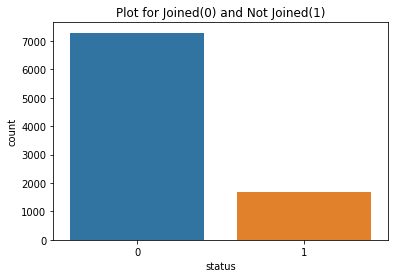

In [79]:
# plot for target variables

sns.countplot(data=df1,x="status").set(title="Plot for Joined(0) and Not Joined(1)")

There is a clear imbalance in our target variable. Inorder to make dataset balanced in nature we will use the Synthetic Minority Oversample TechniquE ( SMOTE ) to make our target variable balanced.

### Summary of above work
- Made the 'Status' column as the last column
- Replace joinied and not-joined as 0 and 1 respectively in the status column
- Divided the dataset into two parts x and y. Where x being independent variables and y being dependent variale
- Created the dummy variables for all the categorical data in x

# Balancing the dataset using the SMOTE

In [80]:
#dummy_var.columns

In [81]:
x.columns.values.tolist()

['doj_extended',
 'duration_to_accept_offer',
 'notice_period',
 'offered_band',
 'percent_difference_ctc',
 'joining_bonus',
 'candidate_relocate_actual',
 'gender',
 'candidate_source',
 'rex_in_yrs',
 'age',
 'lob',
 'location']

In [82]:
x=x.drop(["gender","percent_difference_ctc"],axis=1)

In [83]:
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
x['doj_extended']=lab.fit_transform(x['doj_extended'])
x['joining_bonus']=lab.fit_transform(x['joining_bonus'])
x['offered_band']=lab.fit_transform(x['offered_band'])
x['candidate_relocate_actual']=lab.fit_transform(x['candidate_relocate_actual'])
#x['gender']=lab.fit_transform(x['gender'])
x['candidate_source']=lab.fit_transform(x['candidate_source'])
x['lob']=lab.fit_transform(x['lob'])
x['location']=lab.fit_transform(x['location'])

In [84]:
x.columns.values.tolist()

['doj_extended',
 'duration_to_accept_offer',
 'notice_period',
 'offered_band',
 'joining_bonus',
 'candidate_relocate_actual',
 'candidate_source',
 'rex_in_yrs',
 'age',
 'lob',
 'location']

In [85]:
#x['gender'].unique()

In [86]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler

#st_x= StandardScaler()  
#x= st_x.fit_transform(x)

From above observation we can see the target variable which is 'y' (Status) got balanced

# Training and Testing our data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
# splitting the dataset as 75% and 25%.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [89]:
#Checking shape of train,test
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6726, 11), (2242, 11), (6726,), (2242,))

# Logistic Regression

In [90]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [91]:
lr = LogisticRegression()

In [92]:
modelpr=lr.fit(x_train,y_train)

C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
pred_res=modelpr.predict(x_test) #predicting result

In [94]:
pd.crosstab(y_test,pred_res)

col_0,0,1
status,,
0,1779,15
1,424,24


In [95]:
from sklearn.metrics import confusion_matrix

In [96]:
cnf_matrix=confusion_matrix(y_test,pred_res)

Text(0.5, 257.44, 'Predicted label')

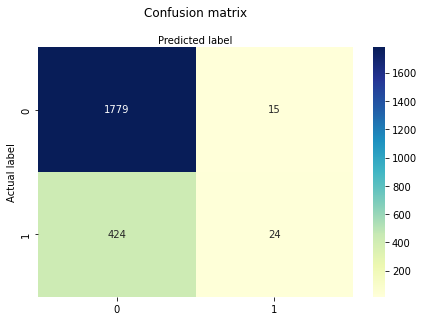

In [97]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [98]:

print_scores("Logistic Regression",y_test,pred_res)

Name of the algorithm: Logistic Regression
Accuracy: 0.804192685102587
Precision: 0.6153846153846154
Recall: 0.05357142857142857
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1794
           1       0.62      0.05      0.10       448

    accuracy                           0.80      2242
   macro avg       0.71      0.52      0.49      2242
weighted avg       0.77      0.80      0.73      2242



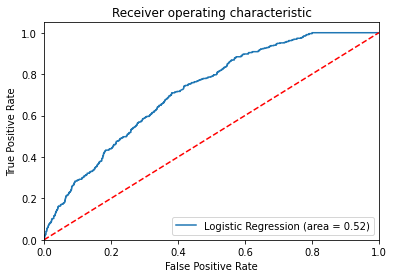

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=2000,max_depth=3)
classifier_rf.fit(x_train,y_train)
y_pred_rf=classifier_rf.predict(x_test)

Text(33.0, 0.5, 'ACTUAL')

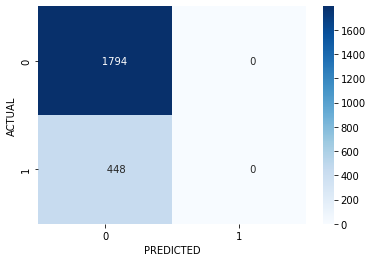

In [101]:
#Confusion Matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm_rf,annot=True,fmt='10',cmap='Blues')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

In [102]:
print_scores("Random Forest",y_test,y_pred_rf)

Name of the algorithm: Random Forest
Accuracy: 0.800178412132025
Precision: 0.0
Recall: 0.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1794
           1       0.00      0.00      0.00       448

    accuracy                           0.80      2242
   macro avg       0.40      0.50      0.44      2242
weighted avg       0.64      0.80      0.71      2242



C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedM

C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


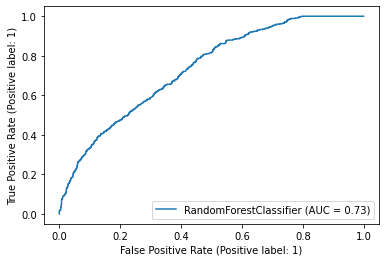

In [103]:
metrics.plot_roc_curve(classifier_rf, x_test, y_test)

# Gradient Boosting Classifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators = 2000,max_depth=2)
gb_classifier.fit(x_train,y_train)
y_pred_gb=gb_classifier.predict(x_test)

Text(33.0, 0.5, 'ACTUAL')

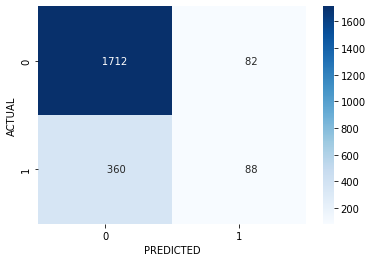

In [105]:
#Confusion Matrix
cm_gb=confusion_matrix(y_test,y_pred_gb)
sns.heatmap(cm_gb,annot=True,fmt='10',cmap='Blues')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')

In [106]:

print_scores("Gradient Boosting",y_test,y_pred_gb)

Name of the algorithm: Gradient Boosting
Accuracy: 0.8028545941123997
Precision: 0.5176470588235295
Recall: 0.19642857142857142
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1794
           1       0.52      0.20      0.28       448

    accuracy                           0.80      2242
   macro avg       0.67      0.58      0.59      2242
weighted avg       0.76      0.80      0.77      2242



C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


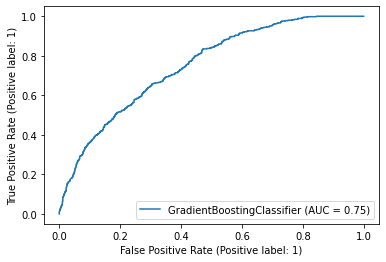

In [107]:
metrics.plot_roc_curve(gb_classifier, x_test, y_test)

# Decision Tree Before Pruning

In [108]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(x_test)

print_scores("Decision Tree",y_test,y_pred_dt)

Name of the algorithm: Decision Tree
Accuracy: 0.7328278322925958
Precision: 0.33109619686800895
Recall: 0.33035714285714285
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1794
           1       0.33      0.33      0.33       448

    accuracy                           0.73      2242
   macro avg       0.58      0.58      0.58      2242
weighted avg       0.73      0.73      0.73      2242



[Text(0.6, 0.9166666666666666, 'X[5] <= 0.5\ngini = 0.299\nsamples = 6726\nvalue = [5496, 1230]'),
 Text(0.5333333333333333, 0.75, 'X[2] <= 37.5\ngini = 0.336\nsamples = 5764\nvalue = [4534, 1230]'),
 Text(0.26666666666666666, 0.5833333333333334, 'X[1] <= 74.5\ngini = 0.263\nsamples = 3802\nvalue = [3211, 591]'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[6] <= 0.5\ngini = 0.248\nsamples = 3711\nvalue = [3172, 539]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.313\nsamples = 1030\nvalue = [830, 200]'),
 Text(0.2, 0.25, 'gini = 0.221\nsamples = 2681\nvalue = [2342, 339]'),
 Text(0.4, 0.4166666666666667, 'X[1] <= 105.0\ngini = 0.49\nsamples = 91\nvalue = [39, 52]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.49\nsamples = 65\nvalue = [37, 28]'),
 Text(0.4666666666666667, 0.25, 'gini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.8, 0.5833333333333334, 'X[9] <= 6.5\ngini = 0.439\nsamples = 1962\nvalue = [1323, 639]'),
 Text(0.7333333333333333, 0.4166666666666667, 'X[1] <= 20.5\ng

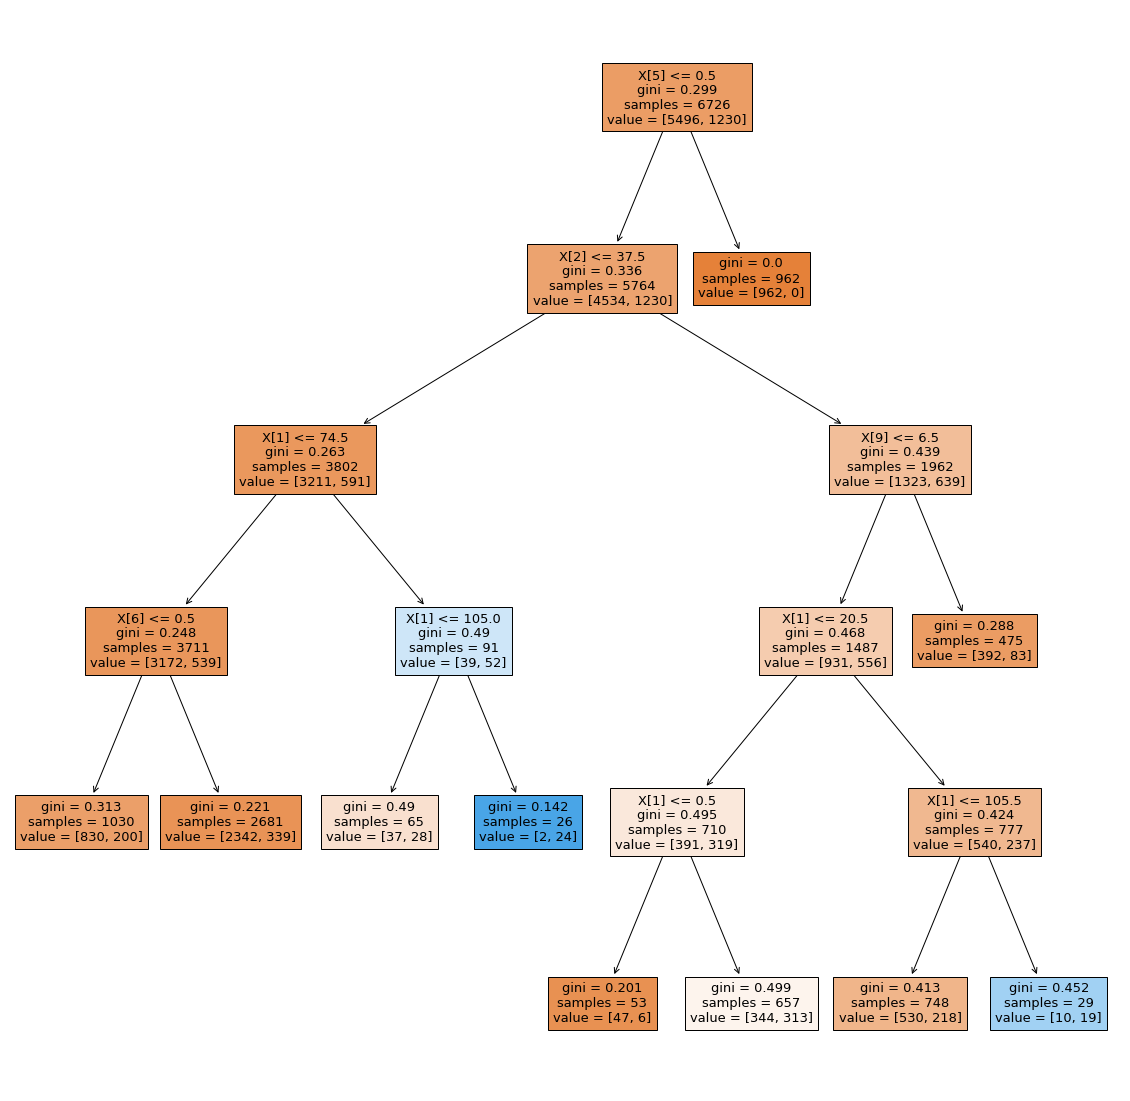

In [109]:
from sklearn import tree

dtree = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10,min_samples_leaf=5)
dtree = dtree.fit(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,filled=True)

# Decision Tree After Pruning

In [118]:
x_train

,doj_extended,duration_to_accept_offer,notice_period,offered_band,joining_bonus,candidate_relocate_actual,candidate_source,rex_in_yrs,age,lob,location
3896,1,26,30,1,0,0,1,1,25.0,4,1
6176,0,15,30,1,0,0,0,3,28.0,1,1
6500,0,10,30,1,0,1,0,3,27.0,4,2
4151,1,0,30,2,0,0,1,3,31.0,7,8
4193,1,5,30,2,0,0,0,7,30.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2922,1,23,60,1,0,0,1,4,27.0,2,8
7840,0,0,30,1,0,1,1,8,34.0,0,1
932,0,8,30,2,0,0,1,4,27.0,7,2
5219,0,39,30,1,0,0,1,3,26.0,1,1


[Text(0.7556818181818182, 0.9444444444444444, 'X[5] <= 0.826\ngini = 0.299\nsamples = 6726\nvalue = [5496, 1230]'),
 Text(0.7102272727272727, 0.8333333333333334, 'X[1] <= 115.766\ngini = 0.336\nsamples = 5764\nvalue = [4534, 1230]'),
 Text(0.5340909090909091, 0.7222222222222222, 'X[2] <= 46.855\ngini = 0.332\nsamples = 5731\nvalue = [4526, 1205]'),
 Text(0.3181818181818182, 0.6111111111111112, 'X[1] <= 65.228\ngini = 0.273\nsamples = 4100\nvalue = [3431, 669]'),
 Text(0.22727272727272727, 0.5, 'X[6] <= 1.703\ngini = 0.262\nsamples = 3955\nvalue = [3342, 613]'),
 Text(0.18181818181818182, 0.3888888888888889, 'X[2] <= 37.025\ngini = 0.283\nsamples = 3223\nvalue = [2673, 550]'),
 Text(0.13636363636363635, 0.2777777777777778, 'X[4] <= 0.481\ngini = 0.267\nsamples = 2977\nvalue = [2505, 472]'),
 Text(0.09090909090909091, 0.16666666666666666, 'X[6] <= 0.358\ngini = 0.26\nsamples = 2891\nvalue = [2446, 445]'),
 Text(0.045454545454545456, 0.05555555555555555, 'gini = 0.309\nsamples = 985\nvalu

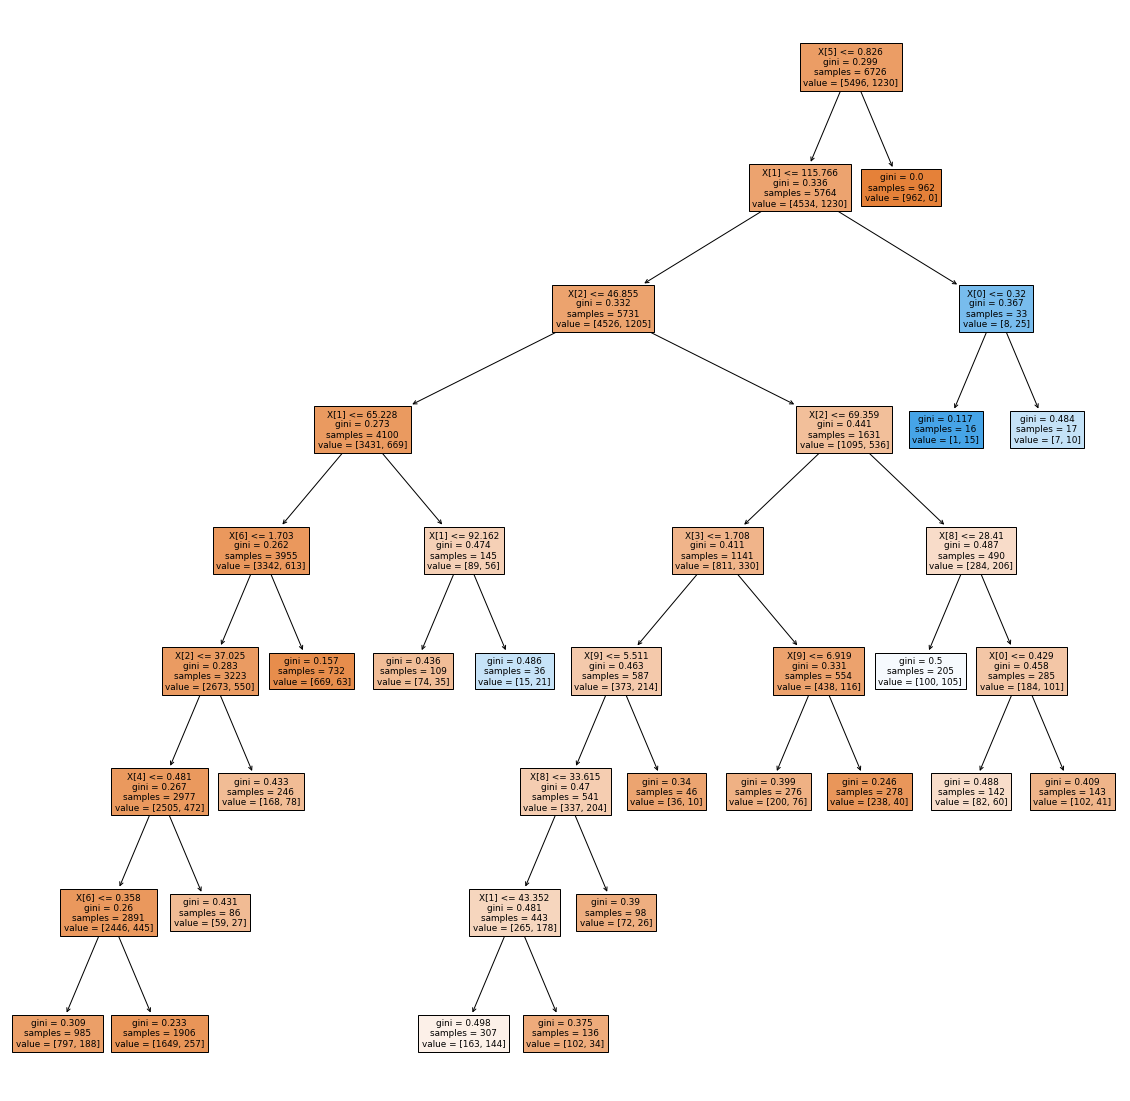

In [110]:
from sklearn import tree

dtree = DecisionTreeClassifier(max_depth=39, max_leaf_nodes=19, min_samples_leaf=8, criterion='gini', splitter='random', min_samples_split=14)
dtree = dtree.fit(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dtree,filled=True)


In [111]:
y_pred_dt_pr = dtree.predict(x_test)
print_scores("Decision Tree Pruned",y_test,y_pred_dt_pr)

Name of the algorithm: Decision Tree Pruned
Accuracy: 0.7966101694915254
Precision: 0.44871794871794873
Recall: 0.078125
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1794
           1       0.45      0.08      0.13       448

    accuracy                           0.80      2242
   macro avg       0.63      0.53      0.51      2242
weighted avg       0.74      0.80      0.73      2242



In [112]:

# Do a plot on models accuracy and training and testing dat with respective to depth n various params
# seaborn line plot
"""
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1),
             "max_leaf_nodes":range(2,20,1)
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
"""

'\nfrom sklearn import decomposition, datasets\nfrom sklearn import tree\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.preprocessing import StandardScaler\n\ngrid_param={"criterion":["gini","entropy"],\n             "splitter":["best","random"],\n             "max_depth":range(2,50,1),\n             "min_samples_leaf":range(1,15,1),\n             "min_samples_split":range(2,20,1),\n             "max_leaf_nodes":range(2,20,1)\n            }\ngrid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)\ngrid_search.fit(x_train,y_train)\nprint(grid_search.best_params_)\n'

In [113]:
import xgboost
classifier_xg = xgboost.XGBClassifier()
xg_fit=classifier_xg.fit(x_train, y_train)
pred_xg=classifier_xg.predict(x_test)

print_scores("XG Boost",y_test,pred_xg)

[23:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Name of the algorithm: XG Boost
Accuracy: 0.8019625334522748
Precision: 0.5091743119266054
Recall: 0.24776785714285715
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1794
           1       0.51      0.25      0.33       448

    accuracy                           0.80      2242
   macro avg       0.67      0.59      0.61      2242
weighted avg       0.77      0.80      0.77      2242



C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


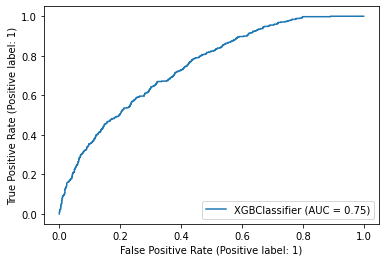

In [114]:
metrics.plot_roc_curve(xg_fit, x_test, y_test)

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsClassifier(n_neighbors=2)
model_knn=knn.fit(x_train, y_train)
pred_knn=model_knn.predict(x_test)

print_scores("KNN",y_test,pred_knn)

confusion_matrix(y_test,pred_knn)


Name of the algorithm: KNN
Accuracy: 0.7805530776092774
Precision: 0.34057971014492755
Recall: 0.10491071428571429
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1794
           1       0.34      0.10      0.16       448

    accuracy                           0.78      2242
   macro avg       0.57      0.53      0.52      2242
weighted avg       0.72      0.78      0.73      2242



array([[1703,   91],
       [ 401,   47]], dtype=int64)

# As we are getting the best parameters. The code will run for about 5 HOURS.

## Issues faced in the dataset
- As there is not column to suggest that people have accepted the offer or not. Hence, We have assumed that the data is of the canddates who have already accepted the offer.
- As there were 13 null values present in the 'Offered Band' column, we have removed those 13 rows from our dataset.
- After doing outlier analysis, we found out that there no significant effect on our target variable (After removing those outliers from the numerical based columns).
- As there were null values present in the age column, we have replaced them wiht the median age of the candidates. We also took relative experience in years into consideration for this data cleaning.
- Our target variable was biased in terms of people joining the complany. Hence, SMOTE operation was performed.
- Upon visualizing the decision tree, we found out that the tree was overfitting. Hence pruning was performed by getting the best parameter.

In [116]:
import pickle

pickle.dump(dtree, open(data_path+'/decisiontreemodel.pkl','wb'))

In [119]:
model = pickle.load(open(data_path+'/decisiontreemodel.pkl','rb'))
print(model.predict(x.iloc[1,:].values.reshape(1,-1)))

[0]


C:\Users\kusagrawal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
